# load **libraries**

In [1]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

### load Data

In [2]:
df = pd.read_csv(r"/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data exploration

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C


In [6]:
print(len(df))

891


In [7]:
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data = df.isnull().sum()
data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
data[data > 0]

,0
Age,177
Cabin,687
Embarked,2


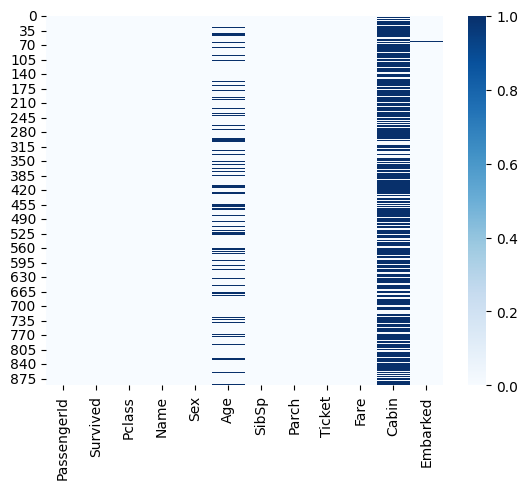

In [13]:
sns.heatmap(df.isnull(),cmap = "Blues")
plt.show()

### Data cleaning

In [14]:
columns_to_drop = ["Name", "Cabin", "Ticket", "Embarked", "Fare"]
df = df.drop(columns_to_drop,axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,NaN,1,2
889,890,1,1,male,26.0,0,0


In [15]:
df.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
889,890,1,1,male,26.0,0,0


In [16]:
df["Age"].fillna(df["Age"].median(),inplace = True)

<ipython-input-16-775b35e6b1c6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace = True)


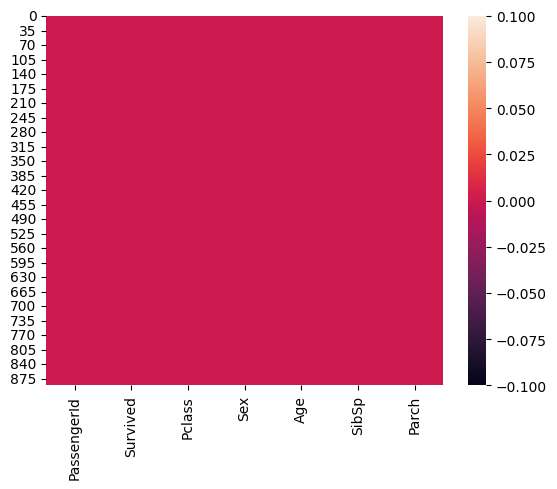

In [17]:
sns.heatmap(df.isnull())
plt.show()

### Data transformation

In [23]:
df['Sex'].replace({'female': 0, 'male': 1}, inplace=True)
df

<ipython-input-23-252b68081173>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'female': 0, 'male': 1}, inplace=True)
<ipython-input-23-252b68081173>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace({'female': 0, 'male': 1}, inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,28.0,1,2
889,890,1,1,1,26.0,0,0


### data analysis

In [24]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000


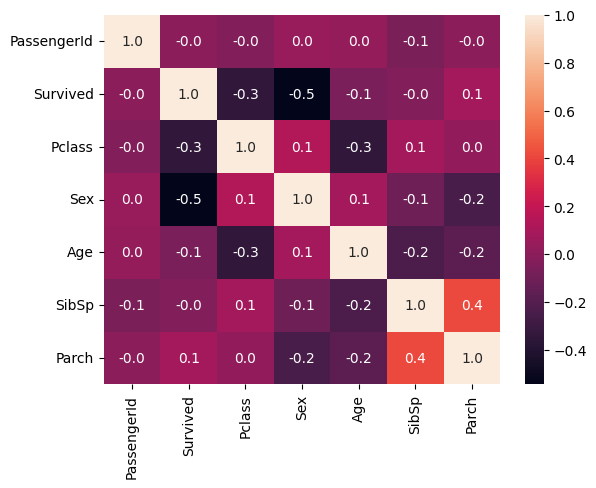

In [33]:
sns.heatmap(df.corr(),annot = True ,fmt =".1f")
plt.show()

In [27]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


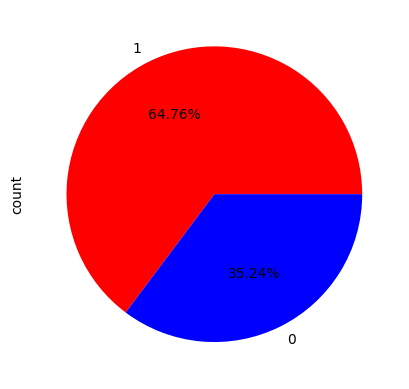

In [41]:
df.Sex.value_counts().plot.pie(autopct="%0.2f%%",colors=["red", "blue"])
plt.show()

<ipython-input-31-0ed6aabe4d67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sex"], palette=["#3498db", "#e74c3c"])  # الأزرق والأحمر


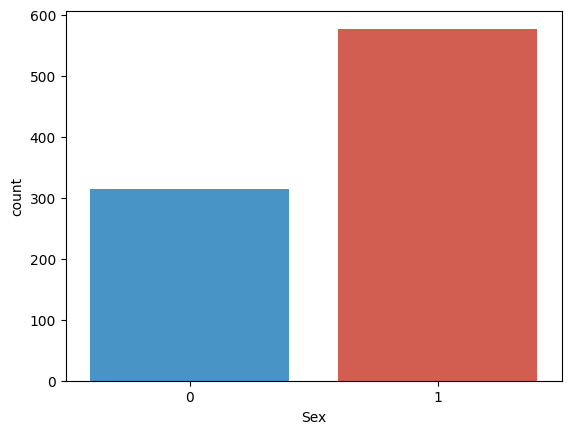

In [31]:
sns.countplot(x=df["Sex"], palette=["#3498db", "#e74c3c"])  # الأزرق والأحمر
plt.show()

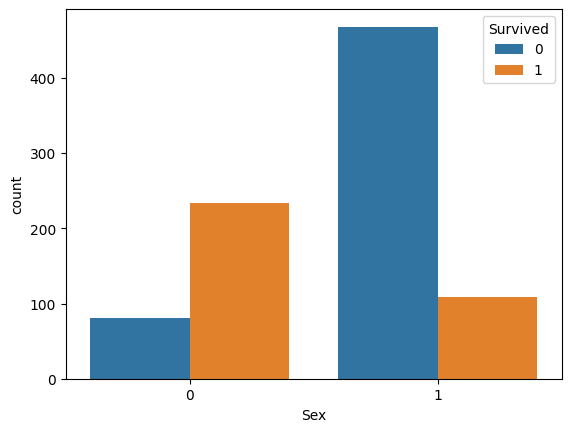

In [37]:
sns.countplot(x=df["Sex"],hue = df["Survived"])
plt.show()

<ipython-input-39-b3e49d867d5d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Pclass"], palette="pastel")


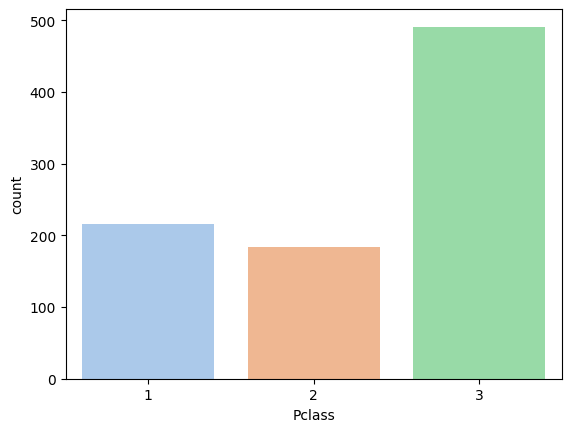

In [39]:
sns.countplot(x=df["Pclass"], palette="pastel")
plt.show()

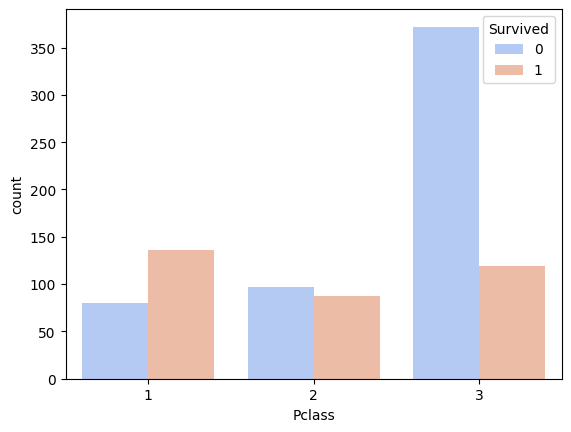

In [40]:
sns.countplot(x=df["Pclass"], hue=df["Survived"], palette="coolwarm")
plt.show()

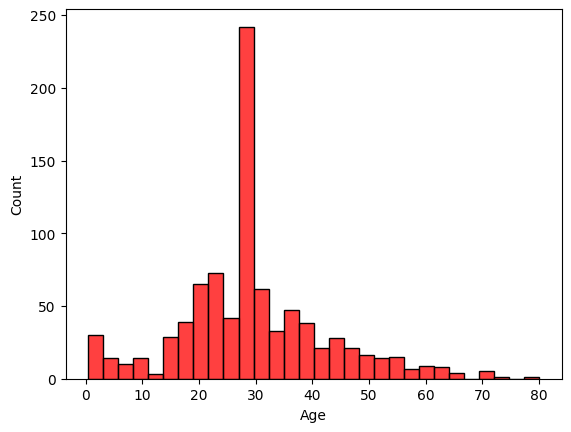

In [43]:
sns.histplot(df["Age"], color="red")
plt.show()

### Create model

In [44]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state= 44,
                                          shuffle = True)

In [61]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MLPClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
model6 = GradientBoostingClassifier()
model7 = XGBClassifier()

In [62]:
accuracies = []

def all(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred,y_test)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)

In [63]:
all(model1)
all(model2)
all(model3)
all(model4)
all(model5)
all(model6)
all(model7)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy = 0.7374301675977654
accuracy = 0.7150837988826816
accuracy = 0.7318435754189944
accuracy = 0.770949720670391
accuracy = 0.6983240223463687
accuracy = 0.7597765363128491
accuracy = 0.7318435754189944


In [64]:
algorithms = ["LogisticRegression","GaussianNB","MLPClassifier","RandomForestClassifier"," DecisionTreeClassifier","GradientBoostingClassifier","XGBClassifier"]
new = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})
new

,algorithms,accuracies
0,LogisticRegression,0.737430
1,GaussianNB,0.715084
2,MLPClassifier,0.731844
3,RandomForestClassifier,0.770950
4,DecisionTreeClassifier,0.698324
5,GradientBoostingClassifier,0.759777
6,XGBClassifier,0.731844


In [70]:
modelx = RandomForestClassifier(n_estimators=50)
modelx.fit(X_train,y_train)
prex = modelx.predict(X_test)
accuracy_score(prex,y_test)

0.776536312849162

In [73]:
acc = accuracy_score(y_test, prex)
print('Accuracy:',acc)

Accuracy: 0.776536312849162


In [74]:
cm = confusion_matrix(y_test, prex)
print('Confusion Matrix:',cm)

Confusion Matrix: [[91 15]
 [25 48]]


In [75]:
cr = classification_report(y_test, prex)
print('Classification Report:',cr)

Classification Report:               precision    recall  f1-score   support

           0       0.78      0.86      0.82       106
           1       0.76      0.66      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



In [77]:
import pickle

with open("model.Titanic", "wb") as f:
    pickle.dump(modelx, f)